<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


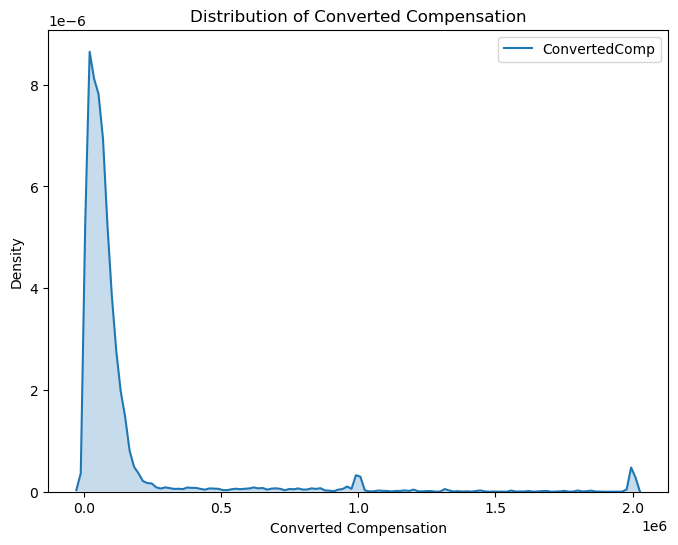

In [3]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out NaN values in 'ConvertedComp' column for the plot
converted_comp = df['ConvertedComp'].dropna()

# Plotting the distribution curve (KDE plot) for 'ConvertedComp' using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.kdeplot(converted_comp, shade=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


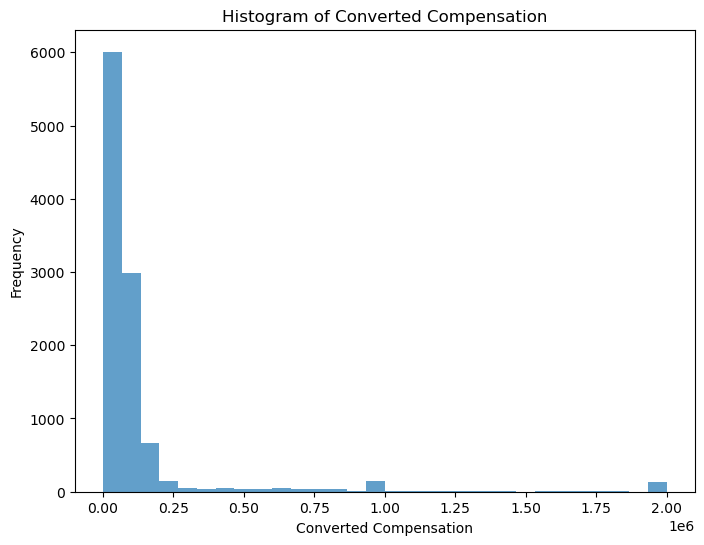

In [4]:
# your code goes here
import matplotlib.pyplot as plt

# Filter out NaN values in 'ConvertedComp' column for the plot
converted_comp = df['ConvertedComp'].dropna()

# Plotting the histogram for 'ConvertedComp'
plt.figure(figsize=(8, 6))
plt.hist(converted_comp, bins=30, alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
count_of_men = (df['Gender'] == 'Man').sum()
print(f"Count of 'Man' in the 'Gender' column: {count_of_men}")

Count of 'Man' in the 'Gender' column: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

print(f"The median ConvertedComp of responders identifying only as Woman: {median_converted_comp_woman}")

The median ConvertedComp of responders identifying only as Woman: 57708.0


Give the five number summary for the column `Age`?


In [8]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

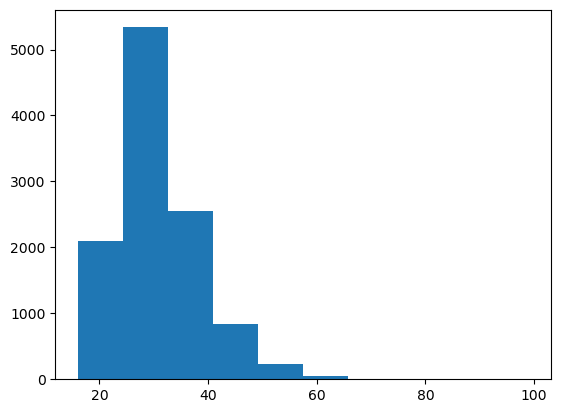

In [9]:
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


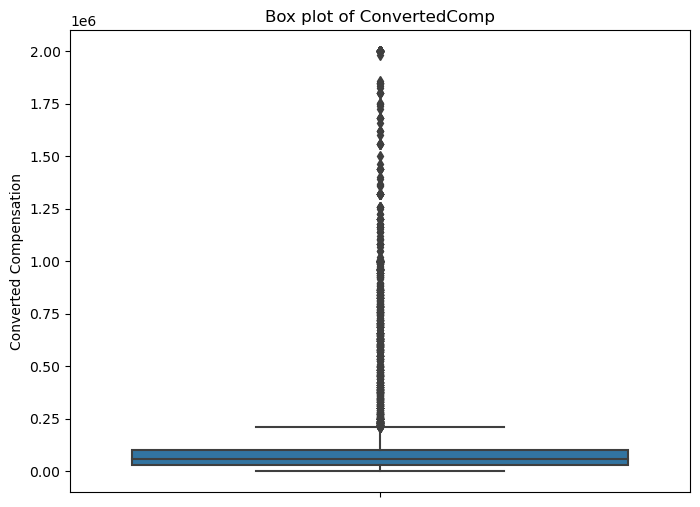

In [10]:
# your code goes here
import seaborn as sns

# Create a box plot for 'ConvertedComp' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ConvertedComp'])
plt.title('Box plot of ConvertedComp')
plt.ylabel('Converted Compensation')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
Q3=df['ConvertedComp'].quantile(0.75)
Q1=df['ConvertedComp'].quantile(0.25)
IQR=Q3-Q1
print(f"Interquartile Range (IQR): {IQR}")

Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
Q3=df['ConvertedComp'].quantile(0.75)
Q1=df['ConvertedComp'].quantile(0.25)
IQR=Q3-Q1
Upper_Bound=Q3+(1.5*IQR)
print(f"Upper Bound for outliers: {Upper_Bound}")

Upper Bound for outliers: 209698.0


In [15]:
Q3=df['ConvertedComp'].quantile(0.75)
Q1=df['ConvertedComp'].quantile(0.25)
IQR=Q3-Q1
Lower_Bound=Q1-(1.5*IQR)
print(f"Lower Bound for outliers: {Lower_Bound}")

Lower Bound for outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# your code goes here
Upper_Bound = Q3 + (1.5 * IQR)
Lower_Bound = Q1 - (1.5 * IQR)
outliers_count = sum((df['ConvertedComp'] > Upper_Bound) | (df['ConvertedComp'] < Lower_Bound))
print(f"Number of outliers in ConvertedComp column: {outliers_count}")

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [28]:
new_df = df[(df['ConvertedComp'] >= Lower_Bound) & (df['ConvertedComp'] <= Upper_Bound)]

# New DataFrame without outliers in 'ConvertedComp' column
print(new_df)
new_df.median()

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


Respondent       12571.0
CompTotal        63000.0
ConvertedComp    52704.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [29]:
new_df.mean()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Respondent        12501.007317
CompTotal        724113.931155
ConvertedComp     59883.208389
WorkWeekHrs          41.864782
CodeRevHrs            4.737455
Age                  30.695860
dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [25]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
